## Simple autoencoder

In [2]:
import keras

encoding_dim = 32
input_size = 28**2

input_img = keras.Input(shape=(input_size,))
encoded = keras.layers.Dense(encoding_dim, activation='relu')(input_img)
decoded = keras.layers.Dense(input_size, activation='sigmoid')(encoded)

autoencoder = keras.Model(input_img, decoded)

Build encoder part

In [3]:
encoder = keras.Model(input_img, encoded)

Build decoder part

In [4]:
encoded_input = keras.Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

In [5]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [6]:
import numpy as np

(x_train, _), (x_test, _) = keras.datasets.mnist.load_data()

x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

print(x_train.shape)

(60000, 784)


In [7]:
autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 2s 6ms/step - loss: 0.3794 - val_loss: 0.1922
Epoch 2/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1819 - val_loss: 0.1539
Epoch 3/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1491 - val_loss: 0.1336
Epoch 4/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1316 - val_loss: 0.1213
Epoch 5/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1203 - val_loss: 0.1130
Epoch 6/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1128 - val_loss: 0.1073
Epoch 7/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1071 - val_loss: 0.1031
Epoch 8/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1035 - val_loss: 0.0999
Epoch 9/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1006 - val_loss: 0.0976
Epoch 10/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0982 - val_loss: 0.0960

In [8]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

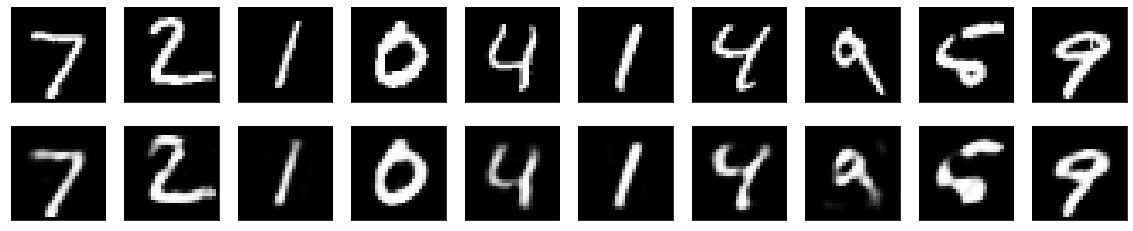

In [9]:
import matplotlib.pyplot as plt

n = 10
plt.figure(figsize=(20,4))

for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()


## CNN Autoencoder

In [10]:
import keras
from keras import layers

input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [11]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [12]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
469/469 [==============================] - 24s 51ms/step - loss: 0.3155 - val_loss: 0.1430
Epoch 2/50
469/469 [==============================] - 24s 51ms/step - loss: 0.1394 - val_loss: 0.1275
Epoch 3/50
469/469 [==============================] - 24s 52ms/step - loss: 0.1263 - val_loss: 0.1203
Epoch 4/50
469/469 [==============================] - 24s 52ms/step - loss: 0.1194 - val_loss: 0.1152
Epoch 5/50
469/469 [==============================] - 24s 50ms/step - loss: 0.1149 - val_loss: 0.1113
Epoch 6/50
469/469 [==============================] - 24s 51ms/step - loss: 0.1117 - val_loss: 0.1083
Epoch 7/50
469/469 [==============================] - 25s 54ms/step - loss: 0.1088 - val_loss: 0.1057
Epoch 8/50
469/469 [==============================] - 25s 52ms/step - loss: 0.1067 - val_loss: 0.1044
Epoch 9/50
469/469 [==============================] - 24s 51ms/step - loss: 0.1048 - val_loss: 0.1029
Epoch 10/50
469/469 [==============================] - 25s 53ms/step - loss: 0.103

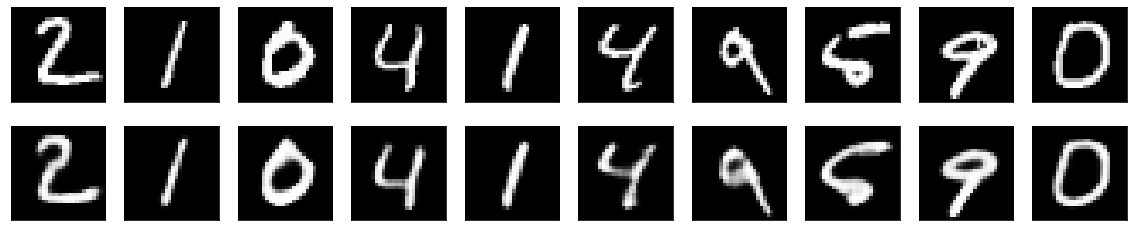

In [13]:
import matplotlib.pyplot as plt

decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))

for i in range(1, n + 1):
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

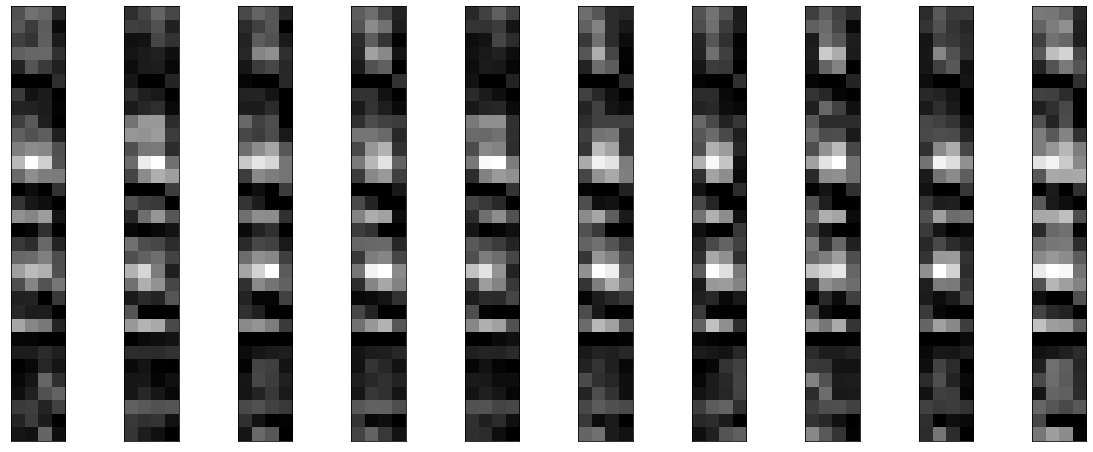

In [14]:
encoder = keras.Model(input_img, encoded)
encoded_imgs = encoder.predict(x_test)

n = 10
plt.figure(figsize=(20,8))

for i in range(1, n+1):
    ax = plt.subplot(1, n, i)
    plt.imshow(encoded_imgs[i].reshape(4, 4 * 8).T)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

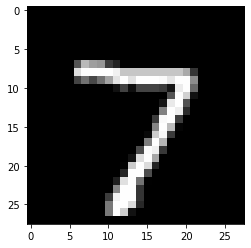

In [15]:
plt.imshow(x_test[0].reshape(28, 28))

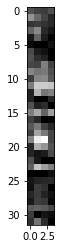

In [17]:
plt.imshow(encoded_imgs[0].reshape(4, 4 * 8).T)

In [20]:
print(encoded.shape)
decoder_input = keras.Input(shape=encoded.shape)
decoder = keras.Model(decoder_input, decoded)

decoder.compile(optimizer='adam', loss='binary_crossentropy')

(None, 4, 4, 8)


ValueError: Graph disconnected: cannot obtain value for tensor KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='input_3'), name='input_3', description="created by layer 'input_3'") at layer "conv2d". The following previous layers were accessed without issue: []